In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.options.display.max_columns = 500  
train = pd.read_csv('../Data/data/raw/train.csv')
test  = pd.read_csv('../Data/data/raw/test.csv') 

In [18]:
train['product_type']

0           Investment
1           Investment
2           Investment
3           Investment
4           Investment
             ...      
30466       Investment
30467       Investment
30468    OwnerOccupier
30469       Investment
30470       Investment
Name: product_type, Length: 30471, dtype: object

In [5]:
test.head() 

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0  30474  2015-07-01     39.0     20.7      2          9         1   
1  30475  2015-07-01     79.2      NaN      8         17         1   
2  30476  2015-07-01     40.5     25.1      3          5         2   
3  30477  2015-07-01     62.8     36.0     17         17         1   
4  30478  2015-07-01     40.0     40.0     17         17         1   

   build_year  num_room  kitch_sq  state   product_type  \
0      1998.0         1       8.9    3.0     Investment   
1         0.0         3       1.0    1.0  OwnerOccupier   
2      1960.0         2       4.8    2.0     Investment   
3      2016.0         2      62.8    3.0  OwnerOccupier   
4         0.0         1       1.0    1.0  OwnerOccupier   

                  sub_area        area_m  raion_popul  green_zone_part  \
0           Juzhnoe Butovo  2.615514e+07       178264         0.137846   
1     Poselenie Vnukovskoe  2.553630e+07         4001         0.496315   
2                   Perovo  9.946335e+06       139322         0.065409   
3  Poselenie Voskresenskoe  2.149409e+07         7122         0.262459   
4     Poselenie Vnukovskoe  2.553630e+07         4001         0.496315   

   indust_part  children_preschool  preschool_quota  \
0     0.041116               14080          11926.0   
1     0.007122                 275              NaN   
2     0.225825                6400           2232.0   
3     0.017647                 489              NaN   
4     0.007122                 275              NaN   

   preschool_education_centers_raion  children_school  school_quota  \
0                                 11            14892       24750.0   
1                                  0              264           NaN   
2                                  7             6558        7966.0   
3                                  0              469           NaN   
4                                  0              264           NaN   

   school_education_centers_raion  school_education_centers_top_20_raion  \
0                              13                                      1   
1                               0                                      0   
2                               7                                      0   
3                               0                                      0   
4                               0                                      0   

   hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
0                  NaN                         1                        0   
1                  NaN                         0                        0   
2               1548.0                         3                        0   
3                  NaN                         0                        0   
4                  NaN                         0                        0   

   sport_objects_raion  additional_education_raion culture_objects_top_25  \
0                   13                           4                     no   
1                    0                           0                     no   
2                   13                           0                     no   
3                    0                           2                     no   
4                    0                           0                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                       4             4   
1                             0                       1             0   
2                             0                       2             7   
3                             0                       0             0   
4                             0                       1             0   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  n

In [7]:
train['price_per_m2'] = train['price_doc']/(train['full_sq']+1) 

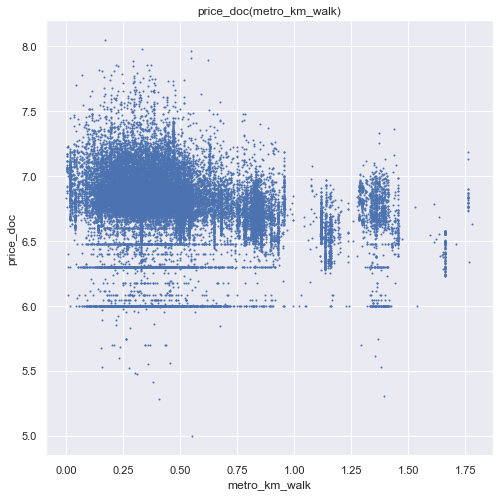

In [8]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10(train['metro_km_walk']+1), np.log10(train['price_doc']) , s= 1)
plt.xlabel('metro_km_walk')
plt.ylabel('price_doc')
plt.title("price_doc(metro_km_walk)" )
plt.show()

In [13]:
print(train['price_per_m2'])

0        132954.545455
1        171428.571429
2        129545.454545
3        145555.555556
4        209377.589744
             ...      
30466    164444.444444
30467    287356.321839
30468    151542.586957
30469    207692.307692
30470    127272.727273
Name: price_per_m2, Length: 30471, dtype: float64


In [14]:
from sklearn.linear_model import SGDRegressor 
model = SGDRegressor()  
features = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_doc'
model.fit( X=train[features].fillna(0), y = train[target] ) 
SGDRegressor() 

SGDRegressor()

In [16]:
test_prediction = model.predict( test[features].fillna(0) )

sample_submission = pd.read_csv('../Data/data/raw/sample_submission.csv')  
sample_submission['price_doc']= test_prediction  

sample_submission['price_doc'] = sample_submission['price_doc'].clip( 1, 1000000000) 
# наши цены должны быть положительными 
sample_submission.to_csv('predict1.csv', index = False) 